In [1]:
import numpy as np

In [2]:
np.random.permutation(5)

array([0, 1, 4, 3, 2])

In [64]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [15]:
data = pd.read_csv("clustering.csv")

In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


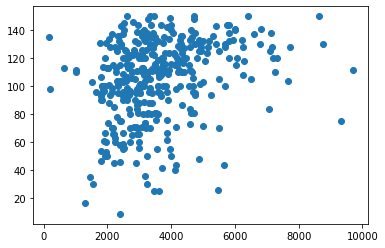

In [17]:
plt.scatter(data["ApplicantIncome"],data["LoanAmount"])

In [18]:
X = data[["ApplicantIncome", "LoanAmount"]]

     ApplicantIncome  LoanAmount
241             4566       100.0
374             3833       110.0
139             6250       128.0


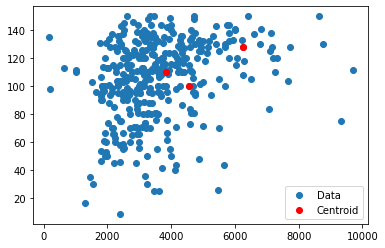

In [8]:
k = 3

centroids = (X.sample(n = k))
print(centroids)
plt.figure()
plt.scatter(X["ApplicantIncome"], X["LoanAmount"])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"] , c = 'red')
plt.legend(["Data", "Centroid"])


In [14]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    #iterate over each centroid point 
    for index1,row_c in centroids.iterrows():
        ED=[]
        #iterate over each data point
        for index2,row_d in XD.iterrows():
            #calculate distance between current point and centroid
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            #append disstance in a list 'ED'
            ED.append(d)
        #append distace for a centroid in original data frame
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        #get distance from centroid of current data point
        min_dist=row[1]
        pos=1
        #loop to locate the closest centroid to current point
        for i in range(k):
            #if current distance is greater than that of other centroids
            if row[i+1] < min_dist:
                #the smaller distanc becomes the minimum distance 
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    #assigning the closest cluster to each data point
    X["Cluster"]=C
    #grouping each cluster by their mean value to create new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['LoanAmount'] - centroids['LoanAmount']).sum() + (centroids_new['ApplicantIncome'] - centroids['ApplicantIncome']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-14-d0232e1f087a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-14-d0232e1f087a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


347.0120816423894
74.07828057315557
-47.006994092845815
-55.63613867407561
-18.485563879564225
-9.190752402517077
-9.19844100901777
-9.237706177129652
0.0


In [19]:
X

,ApplicantIncome,LoanAmount,1
0,4583,128.0,0.462695
1,3000,66.0,0.666158
2,2583,120.0,0.658981
3,6000,141.0,0.114373
4,2333,95.0,0.500181
...,...,...,...
376,5703,128.0,0.858336
377,3232,108.0,0.487731
378,2900,71.0,0.243459
379,4106,40.0,0.673206


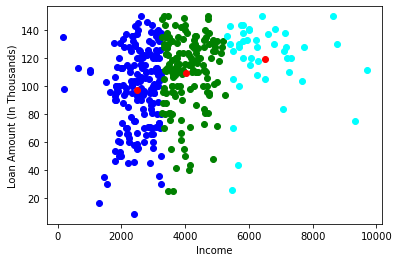

In [18]:
color=['blue','green','cyan']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

# K-means ++ centroid selection

Step: 
 - Randomly select initial centroid
 - Take distance of forst centroid with every other data point 
 - The point farthest would be the next centroid
 - For next centroid, we take squared distance of every point with its closest centroid, the farthest distance in this case is the next centroid

In [19]:
X1 = data[["ApplicantIncome", "LoanAmount"]]
centroids = X1.sample()
print(centroids)
k = 4
i = 1
dist = []
while i != k:
    max_dist = [0,0]
    #do throught the centroids
    for index, row in centroids.iterrows():
        #calculate distance of every centroid with every other data point 
        d = np.sqrt((X1["ApplicantIncome"] - row["ApplicantIncome"])**2 +(X1["LoanAmount"] - row["LoanAmount"])**2)
        #check which centroid has a max distance with another point
        if max(d) > max(max_dist):
            max_dist = d
            
    X1 = pd.concat([X1, max_dist], axis = 1)
    idx = X1.iloc[:,i+1].idxmax()
    max_coor = pd.DataFrame(X1.iloc[idx][["ApplicantIncome", "LoanAmount"]]).T
    centroids = pd.concat([centroids,max_coor])
    X1 = X1.drop(idx)
    i+=1
print("Coordinates found:")
print(centroids)

    ApplicantIncome  LoanAmount
79             2137       137.0
Coordinates found:
     ApplicantIncome  LoanAmount
79            2137.0       137.0
153           9703.0       112.0
132            150.0       135.0
301           2653.0       113.0


In [20]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    #iterate over each centroid point 
    for index1,row_c in centroids.iterrows():
        ED=[]
        #iterate over each data point
        for index2,row_d in XD.iterrows():
            #calculate distance between current point and centroid
            d1=(row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
            d2=(row_c["LoanAmount"]-row_d["LoanAmount"])**2
            d=np.sqrt(d1+d2)
            #append disstance in a list 'ED'
            ED.append(d)
        #append distace for a centroid in original data frame
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        #get distance from centroid of current data point
        min_dist=row[1]
        pos=1
        #loop to locate the closest centroid to current point
        for i in range(k):
            #if current distance is greater than that of other centroids
            if row[i+1] < min_dist:
                #the smaller distanc becomes the minimum distance 
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    #assigning the closest cluster to each data point
    X["Cluster"]=C
    #grouping each cluster by their mean value to create new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['LoanAmount'] - centroids['LoanAmount']).sum() + (centroids_new['ApplicantIncome'] - centroids['ApplicantIncome']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["LoanAmount","ApplicantIncome"]]

<ipython-input-20-d0232e1f087a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-20-d0232e1f087a>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


-171.94566163583238
252.78289740340355
220.0468484708062
196.93681529450578
466.2806274727192
414.4228915344673
272.7716128249689
230.7149565745504
188.3446262774499
191.05775178102292
198.30314917397197
99.15340868127815
209.80343173607628
210.18163568605897
104.37592598909076
74.61998672467274
59.42850752383134
86.4759967061905
66.46585256786895
105.89524042040519
85.93895154883096
0.0


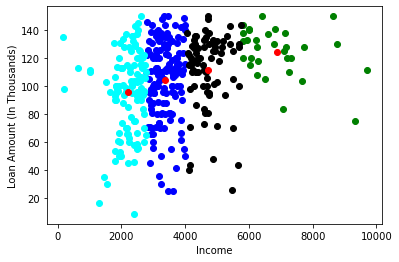

In [21]:
color=['blue','green','cyan','black']
for k in range(k):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(centroids["ApplicantIncome"],centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [10]:
X

,ApplicantIncome,LoanAmount,1,2,3,Cluster
0,4583,128.0,549.706662,1929.786213,2085.250941,1
1,3000,66.0,1034.521934,3513.174648,503.013025,3
2,2583,120.0,1450.632322,3929.767475,87.961117,3
3,6000,141.0,1966.652040,513.218472,3502.297968,2
4,2333,95.0,1700.660175,4179.839177,164.991055,3
...,...,...,...,...,...,...
376,5703,128.0,1669.503528,809.812174,3205.172854,2
377,3232,108.0,801.598078,3280.787556,734.102962,3
378,2900,71.0,1134.258480,3613.092818,402.898105,3
379,4106,40.0,100.539911,2408.079716,1609.054208,1


# Clustering images

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

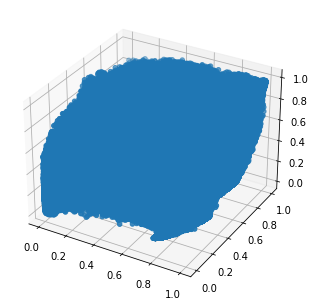

In [47]:

img = cv2.imread("img1.jpg")/255
scale_percent = 50 # percent of original size
width = int(img.shape[1] * scale_percent / 100)
height = int(img.shape[0] * scale_percent / 100)
dim = (width, height)
  
# resize image
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
r, g, b = cv2.split(resized)
r = r.flatten()
g = g.flatten()
b = b.flatten()#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b)
plt.show()

In [48]:
img = resized

In [49]:
#convert the MxNx3 image to a Kx3 image where k = MxN
vectorised = img.reshape((-1,3))

In [62]:
vectorised

array([[0.7245098 , 0.1872549 , 0.        ],
       [0.7254902 , 0.1882353 , 0.        ],
       [0.72745097, 0.19019608, 0.        ],
       ...,
       [0.04313726, 0.34705883, 0.16764706],
       [0.11666667, 0.39607844, 0.20784314],
       [0.20196079, 0.4480392 , 0.25490198]], dtype=float32)

In [58]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(vectorised)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

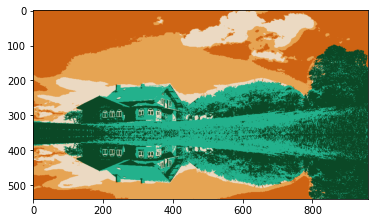

In [59]:
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
plt.imshow(cluster_pic)

In [71]:
img_df = pd.DataFrame(vectorised)
img_df.rename(columns={0:'R', 1:'G', 2: 'B'}, inplace =True)

In [72]:
#taking random centroids for initial tests
centroids = img_df.sample(5)

In [74]:
centroids

,R,G,B
305823,0.055882,0.941176,0.629412
37371,0.768627,0.164706,0.003922
311091,0.022549,0.283333,0.109804
190634,0.968627,0.729412,0.364706
401728,0.000000,0.482353,0.257843


In [73]:
X = img_df

In [76]:
from tqdm import tqdm

In [77]:
k = 5
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    #iterate over each centroid point 
    for index1,row_c in centroids.iterrows():
        ED=[]
        #iterate over each data point
        print("Calculating distance")
        for index2,row_d in tqdm(XD.iterrows()):
            #calculate distance between current point and centroid
            d1=(row_c["R"]-row_d["R"])**2
            d2=(row_c["G"]-row_d["G"])**2
            d3=(row_c["B"]-row_d["B"])**2
            d=np.sqrt(d1+d2+d3)
            #append disstance in a list 'ED'
            ED.append(d)
        #append distace for a centroid in original data frame
        X[i]=ED
        i=i+1

    C=[]
    print("Getting Centroid")
    for index,row in tqdm(X.iterrows()):
        #get distance from centroid of current data point
        min_dist=row[1]
        pos=1
        #loop to locate the closest centroid to current point
        for i in range(k):
            #if current distance is greater than that of other centroids
            if row[i+1] < min_dist:
                #the smaller distanc becomes the minimum distance 
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    #assigning the closest cluster to each data point
    X["Cluster"]=C
    #grouping each cluster by their mean value to create new centroids
    centroids_new = X.groupby(["Cluster"]).mean()[["R","G", "B"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        #check if there is a difference between old and new centroids
        diff = (centroids_new['R'] - centroids['R']).sum() + (centroids_new['G'] - centroids['G']).sum() + (centroids_new['B'] - centroids['B']).sum()
        print(diff.sum())
    centroids = X.groupby(["Cluster"]).mean()[["R","G","B"]]

1279it [00:00, 12693.62it/s]

Calculating distance


518400it [00:34, 15015.53it/s]
1090it [00:00, 10821.04it/s]

Calculating distance


518400it [00:38, 13323.61it/s]
2504it [00:00, 12013.36it/s]

Calculating distance


518400it [00:37, 13947.49it/s]
2552it [00:00, 12153.47it/s]

Calculating distance


518400it [00:36, 14039.65it/s]
2639it [00:00, 12568.89it/s]

Calculating distance


518400it [00:37, 13813.47it/s]
1350it [00:00, 13401.66it/s]

Getting Centroid


518400it [00:34, 14953.95it/s]
2529it [00:00, 12020.75it/s]

Calculating distance


518400it [00:36, 14111.30it/s]
1169it [00:00, 11605.34it/s]

Calculating distance


518400it [00:37, 13949.45it/s]
2501it [00:00, 11784.79it/s]

Calculating distance


518400it [00:37, 13944.15it/s]
1146it [00:00, 11377.09it/s]

Calculating distance


518400it [00:38, 13620.64it/s]
2555it [00:00, 12155.23it/s]

Calculating distance


518400it [00:37, 13979.01it/s]
2921it [00:00, 13894.60it/s]

Getting Centroid


518400it [00:33, 15419.95it/s]
1183it [00:00, 11744.38it/s]

0.23357575
Calculating distance


518400it [00:37, 13997.41it/s]
2648it [00:00, 12436.93it/s]

Calculating distance


518400it [00:36, 14256.87it/s]
2695it [00:00, 12905.04it/s]

Calculating distance


518400it [00:36, 14362.78it/s]
2672it [00:00, 12747.26it/s]

Calculating distance


518400it [00:36, 14287.45it/s]
1237it [00:00, 12274.90it/s]

Calculating distance


518400it [00:35, 14526.95it/s]
1337it [00:00, 13268.43it/s]

Getting Centroid


518400it [00:33, 15505.11it/s]
1231it [00:00, 12216.11it/s]

0.14973429
Calculating distance


518400it [00:35, 14579.35it/s]
1224it [00:00, 12147.10it/s]

Calculating distance


518400it [00:35, 14475.18it/s]
1241it [00:00, 12320.39it/s]

Calculating distance


518400it [00:36, 14256.69it/s]
1199it [00:00, 11903.11it/s]

Calculating distance


518400it [00:35, 14421.11it/s]
1235it [00:00, 12235.45it/s]

Calculating distance


518400it [00:36, 14366.22it/s]
1362it [00:00, 13520.60it/s]

Getting Centroid


518400it [00:32, 15757.67it/s]
1194it [00:00, 11853.39it/s]

0.10464294
Calculating distance


518400it [00:35, 14474.71it/s]
1232it [00:00, 12230.84it/s]

Calculating distance


518400it [00:35, 14534.33it/s]
954it [00:00, 9470.94it/s]

Calculating distance


518400it [00:36, 14236.83it/s]
2678it [00:00, 12763.87it/s]

Calculating distance


518400it [00:35, 14446.38it/s]
2681it [00:00, 12755.79it/s]

Calculating distance


518400it [00:36, 14372.57it/s]
1368it [00:00, 13580.35it/s]

Getting Centroid


518400it [00:32, 15817.98it/s]
1236it [00:00, 12265.21it/s]

0.071899064
Calculating distance


518400it [00:36, 14374.23it/s]
2690it [00:00, 12867.73it/s]

Calculating distance


518400it [00:36, 14394.63it/s]
1224it [00:00, 12151.33it/s]

Calculating distance


518400it [00:35, 14502.37it/s]
2685it [00:00, 12823.89it/s]

Calculating distance


518400it [00:35, 14463.86it/s]
1224it [00:00, 12151.30it/s]

Calculating distance


518400it [00:36, 14331.43it/s]
1360it [00:00, 13500.84it/s]

Getting Centroid


518400it [00:32, 15849.25it/s]
1227it [00:00, 12181.17it/s]

0.04959004
Calculating distance


518400it [00:35, 14430.61it/s]
2672it [00:00, 12647.60it/s]

Calculating distance


518400it [00:36, 14198.15it/s]
1207it [00:00, 11978.14it/s]

Calculating distance


518400it [00:38, 13457.90it/s]
1140it [00:00, 11317.34it/s]

Calculating distance


518400it [00:37, 13827.09it/s]
2540it [00:00, 11982.38it/s]

Calculating distance


518400it [00:37, 13870.08it/s]
2751it [00:00, 13196.51it/s]

Getting Centroid


518400it [00:34, 15159.89it/s]
1143it [00:00, 11343.63it/s]

0.03368214
Calculating distance


518400it [00:37, 13931.03it/s]
1039it [00:00, 10311.54it/s]

Calculating distance


518400it [00:37, 13873.53it/s]
1142it [00:00, 11333.46it/s]

Calculating distance


518400it [00:37, 13795.54it/s]
2551it [00:00, 12017.44it/s]

Calculating distance


518400it [00:38, 13465.97it/s]
2640it [00:00, 12574.68it/s]

Calculating distance


518400it [00:37, 13938.35it/s]
1365it [00:00, 13551.05it/s]

Getting Centroid


518400it [00:33, 15545.76it/s]
1217it [00:00, 12077.52it/s]

0.021959737
Calculating distance


518400it [00:35, 14589.51it/s]
1220it [00:00, 12111.59it/s]

Calculating distance


518400it [00:35, 14475.38it/s]
2688it [00:00, 12840.14it/s]

Calculating distance


518400it [00:36, 14334.60it/s]
1244it [00:00, 12345.09it/s]

Calculating distance


518400it [00:38, 13305.88it/s]
1144it [00:00, 11354.01it/s]

Calculating distance


518400it [00:37, 13837.09it/s]
2794it [00:00, 13227.94it/s]

Getting Centroid


518400it [00:34, 15094.31it/s]
1144it [00:00, 11353.63it/s]

0.015277024
Calculating distance


518400it [00:38, 13432.04it/s]
2608it [00:00, 12422.11it/s]

Calculating distance


518400it [00:37, 13801.24it/s]
1191it [00:00, 11819.97it/s]

Calculating distance


518400it [00:37, 13905.64it/s]
2406it [00:00, 11472.10it/s]

Calculating distance


518400it [00:38, 13451.41it/s]
1140it [00:00, 11317.36it/s]

Calculating distance


518400it [00:38, 13619.23it/s]
1253it [00:00, 12439.26it/s]

Getting Centroid


518400it [00:34, 15152.91it/s]
1154it [00:00, 11452.53it/s]

0.009507209
Calculating distance


518400it [00:38, 13635.96it/s]
2522it [00:00, 11966.45it/s]

Calculating distance


518400it [00:37, 13790.97it/s]
1159it [00:00, 11505.85it/s]

Calculating distance


216992it [00:16, 13524.73it/s]


KeyboardInterrupt: 

In [78]:
X

,R,G,B,1,2,3,4,5,Cluster
0,0.724510,0.187255,0.000000,1.069778,0.332144,0.698504,0.872988,0.824277,2
1,0.725490,0.188235,0.000000,1.069725,0.330994,0.699419,0.872076,0.824573,2
2,0.727451,0.190196,0.000000,1.069625,0.328700,0.701255,0.870256,0.825170,2
3,0.729412,0.192157,0.000000,1.069532,0.326413,0.703096,0.868440,0.825776,2
4,0.735294,0.198039,0.005882,1.065246,0.316997,0.707680,0.858963,0.825273,2
...,...,...,...,...,...,...,...,...,...
518395,0.000000,0.160784,0.020588,0.959427,0.898792,0.123406,1.266333,0.532365,3
518396,0.014706,0.278431,0.112745,0.814229,0.843520,0.060647,1.159684,0.382604,3
518397,0.043137,0.347059,0.167647,0.724823,0.802698,0.133069,1.085306,0.291380,3
518398,0.116667,0.396078,0.207843,0.651195,0.726231,0.209645,0.989000,0.227801,3


In [80]:
centroids = centroids.to_numpy()

In [81]:
centroids

array([[0.20686968, 0.76329714, 0.7380028 ],
       [0.8367853 , 0.46484938, 0.14371929],
       [0.03751147, 0.22340992, 0.12091844],
       [0.9373846 , 0.78801364, 0.5987115 ],
       [0.08355169, 0.58238405, 0.337707  ]], dtype=float32)

In [84]:
labels = X["Cluster"].to_numpy()
segmented_image = centroids[labels-1]
segmented_image = segmented_image.reshape(img.shape)

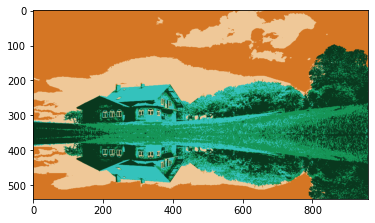

In [89]:
plt.imshow(segmented_image)

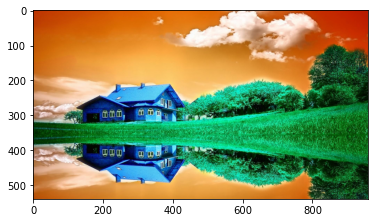

In [92]:
plt.imshow(img)

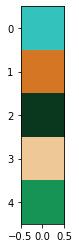

In [91]:
plt.imshow(centroids.reshape(5,1,3))